In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [17]:
#f = lambda x: np.sin(x)
f = lambda x: np.sqrt(1+np.exp(-x**2))

In [22]:
#xi, xf, Npoints = 0., 0.5*np.pi, 12 # Debe ser par, para la regla de simpson
xi, xf, Npoints = -1., 1., 36 # Debe ser par, para la regla de simpson

X = np.linspace(xi,xf,Npoints+1)
Y = f(X)

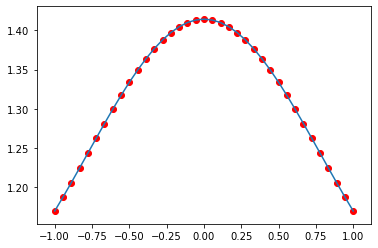

In [23]:
plt.plot(X,Y,label='f(x)')
plt.scatter(X,Y,color='r')

In [24]:
def SimpsonMethod(f,X):
    
    h = (X[-1]-X[0])/(len(X)-1)
    
    integral = 0
    
    integral += f(X[0]) + f(X[-1])
    
    for i in range( len(X[1:-1]) ):
        
        if i%2 == 0:
            integral += 4*f(X[i+1])
        else:
            integral += 2*f(X[i+1])
            
    integral *= h/3
    
    return integral, h

In [25]:
Integral, h = SimpsonMethod(f,X)
print(Integral, h)

2.638857203270583 0.05555555555555555


In [8]:
def D4(f,x,h):
    
    d = 0.
    
    if(h!=0):
        d = ( f(x+2*h) - 4*f(x+h) + 6*f(x) - 4*f(x-h) + f(x-2*h) )/h**4
        
    return d

In [11]:
d4 = D4(f,X,0.001)

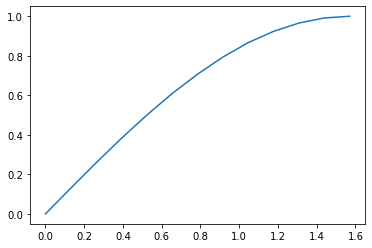

In [12]:
plt.plot(X,d4)

In [13]:
def ErrorSimpsonMethod(X,d4,h):
    
    max_ = np.max(np.abs(d4))
    
    error = ( (X[-1]-X[0])*h**4 *max_ ) / 180.
    
    return error

In [14]:
print(ErrorSimpsonMethod(X,d4,h))

2.5620776526553954e-06


$$ I = 1.000001 \pm 0.000003 $$

$$ I = 1.000001(3) $$ 

Usando el método de Simpson